# Statistical Methods to Time Series prediction
### Introduction:

The original data was aggregated - the sales from all stores was sum up for each index and all other data  was removed. This is to simplify. The one of most frequent index was taken. The aggregated sales data are stored in the *.csv* file

The data wad divided to two sets: from 2013-01.02 up to 2017-07-31 was testing set. The model should predict sales for 15 days forward and I compared it with the test set.

## Data Preparation

Spliting data to train and tes sets and setting date as TimeIndex.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("one_item_205387.csv",sep=";",decimal=",")
df = df.drop(0,axis=0)

In [3]:
df

,date,unit_sales
1,2013-01-02,362.0
2,2013-01-03,358.0
3,2013-01-04,395.0
4,2013-01-05,555.0
5,2013-01-06,576.0
...,...,...
1679,2017-08-11,349.0
1680,2017-08-12,332.0
1681,2017-08-13,289.0
1682,2017-08-14,237.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683 entries, 1 to 1683
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1683 non-null   object 
 1   unit_sales  1683 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.4+ KB


In [5]:
df["date"] = pd.to_datetime(df["date"])
test = df[df.date > "2017-07-31"]
train = df[df.date <= "2017-07-31"]
train.set_index("date",inplace=True)
test.set_index("date",inplace=True)

### ARIMA Model

I use statsmodel library. The ARIMA(6,1,6) wa used.

In [6]:
from statsmodels.tsa.arima.model import ARIMA

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
model_ar_1_i_1_ma_1 = ARIMA(train.unit_sales, order=(6,1,6))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             unit_sales   No. Observations:                 1668
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -9520.656
Date:                Wed, 06 Jan 2021   AIC                          19067.311
Time:                        19:42:01   BIC                          19137.756
Sample:                             0   HQIC                         19093.416
                               - 1668                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0426      5.876      0.007      0.994     -11.474      11.559
ar.L2         -0.6438      5.847     -0.110      0.912     -12.104      10.817
ar.L3         -0.4443      9.369     -0.047      0.962     -18.808      17.920
ar.L4         -0.1207      6.328     -0.019      0.985     -12.522      12.281
ar.L5         -0.8983      6.762     -0.133      0.894     -14.151      12.355
ar.L6          0.1937      1.177      0.165      0.869      -2.114       2.502
ma.L1         -0.6162      5.878     -0.105      0.917     -12.137      10.904
ma.L2          0.4653      9.225      0.050      0.960     -17.615      18.546
ma.L3          0.0796     11.545      0.007      0.994     -22.547      22.707
ma.L4         -0.2585     10.550     -0.025      0.980     -20.936      20.419
ma.L5          0.6636      8.560      0.078      0.938     -16.114      17.441
ma.L6         -0.6959      4.275     -0.163      0.871      -9.075       7.684
sigma2      5973.1019     90.338     66.119      0.000    5796.042    6150.162
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             25504.70
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.77
Prob(H) (two-sided):                  0.52   Kurtosis:                        22.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Prediction

In [9]:
prediction =results_ar_1_i_1_ma_1.forecast(steps=15)

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
mean_squared_error(prediction.values,test.unit_sales)

1591.2737872966848

In [12]:
test["prediction"] = prediction.values

<AxesSubplot:xlabel='date'>

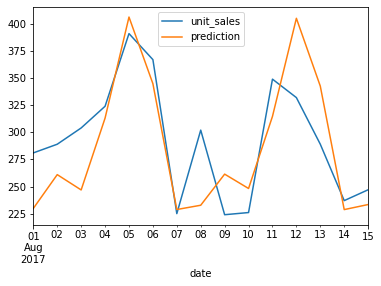

In [13]:
test.plot()

We obtained similar MSE to Random Forest

Things TODO for the future:
1. Perform more systematic hyperparameter ARIMA selection
2. Use other methods e.g. SARIMA
